# CURLF Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_curlf = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/curlf.csv')
df_curlf['Date'] = pd.to_datetime(df_curlf['Date'])
df_curlf = df_curlf.set_index('Date')
df_curlf = df_curlf.rename(columns={'Open':'curlf_Open', 'High':'curlf_High', 'Low':'curlf_Low', 'Close':'curlf_Close', 'Volume':'curlf_Volume'})
df_curlf = df_curlf.drop('Adj Close', axis=1)
df_curlf['curlf_prev_close'] = df_curlf['curlf_Close'].shift(1)
df_curlf['curlf_next_close'] = df_curlf['curlf_Close'].shift(-1)
df_curlf['curlf_diff'] = df_curlf['curlf_Close'].diff()
df_curlf['curlf_%change'] = df_curlf['curlf_Close'].pct_change()
df_curlf['curlf_5day_avg_close'] = df_curlf['curlf_Close'].rolling(5).mean()
df_curlf['curlf_5day_avg_diff'] = df_curlf['curlf_diff'].rolling(5).mean()
df_curlf['curlf_10day_avg_close'] = df_curlf['curlf_Close'].rolling(10).mean()
df_curlf['curlf_10day_avg_diff'] = df_curlf['curlf_diff'].rolling(10).mean()

In [4]:
df_curlf

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946       8.500      5.824        5.850         47400   
2018-10-30       5.655       6.560      5.653        6.560         99900   
2018-10-31       6.725       7.400      6.723        7.210        207500   
2018-11-01       7.577       8.500      7.364        8.409        457000   
2018-11-02       8.557       9.800      8.047        8.434        354000   
...                ...         ...        ...          ...           ...   
2022-05-03       6.000       6.000      5.590        5.790        489200   
2022-05-04       5.950       5.950      5.470        5.740        715300   
2022-05-05       6.000       6.000      5.380        5.500        490700   
2022-05-06       5.320       5.952      5.140        5.952        539500   
2022-05-09       5.940       5.940      5.370        5.610        489700   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29               NaN             6.560         NaN            NaN   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   
...                      ...               ...         ...            ...   
2022-05-03             5.900             5.740      -0.110      -0.018644   
2022-05-04             5.790             5.500      -0.050      -0.008636   
2022-05-05             5.740             5.952      -0.240      -0.041812   
2022-05-06             5.500             5.610       0.452       0.082182   
2022-05-09             5.952               NaN      -0.342      -0.057460   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                   NaN                  NaN                    NaN   
2018-10-30                   NaN                  NaN                    NaN   
2018-10-31                   NaN                  NaN                    NaN   
2018-11-01                   NaN                  NaN                    NaN   
2018-11-02                7.2926                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                5.9266              -0.0980                 6.0953   
2022-05-04                5.8786              -0.0480                 6.0553   
2022-05-05                5.7606              -0.1180                 5.9903   
2022-05-06                5.7764               0.0158                 5.9395   
2022-05-09                5.7184              -0.0580                 5.8715   

            curlf_10day_avg_diff  
Date                              
2018-10-29                   NaN  
2018-10-30                   NaN  
2018-10-31                   NaN  
2018-11-01                   NaN  
2018-11-02                   NaN  
...                          ...  
2022-05-03               -0.0520  
2022-05-04               -0.0400  
2022-05-05               -0.0650  
2022-05-06               -0.0508  
2022-05-09               -0.0680  

[888 rows x 13 columns]

In [5]:
cut = df_curlf.index.min()
cut

Timestamp('2018-10-29 00:00:00')

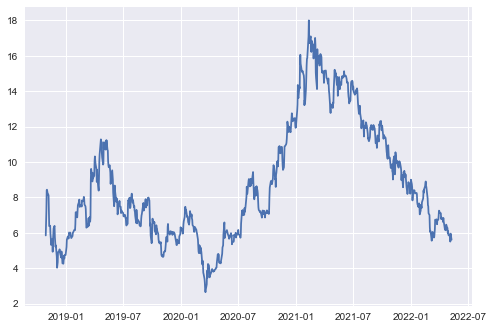

In [6]:
plt.plot(df_curlf['curlf_Close'])

## CURLF and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-04   33171.80   34117.74  33021.84    34061.06  479098068.0   
2022-05-05   33854.17   33854.17  32685.10    32997.97  507031169.0   
2022-05-06   32773.88   33055.84  32474.69    32899.37  457941820.0   
2022-05-09   32685.17   32685.17  32121.98    32245.70  535207901.0   
2022-05-10   32504.09   32752.17  31887.89    32160.74  493104054.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-04         33128.79         32997.97     932.27      0.028141   
2022-05-05         34061.06         32899.37   -1063.09     -0.031211   
2022-05-06         32997.97         32245.70     -98.60     -0.002988   
2022-05-09         32899.37         32160.74    -653.67     -0.019869   
2022-05-10         32245.70              NaN     -84.96     -0.002635   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-04            33428.990             151.826             33634.068   
2022-05-05            33245.306            -183.684             33454.589   
2022-05-06            33229.738             -15.568             33363.386   
2022-05-09            33066.578            -163.160             33183.010   
2022-05-10            32872.968            -193.610             33075.066   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-04             -109.973  
2022-05-05             -179.479  
2022-05-06              -91.203  
2022-05-09             -180.376  
2022-05-10             -107.944  

[32631 rows x 13 columns]

In [8]:
df0 = pd.merge(df_curlf, df_dow, on='Date', how='left')
df0

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946       8.500      5.824        5.850         47400   
2018-10-30       5.655       6.560      5.653        6.560         99900   
2018-10-31       6.725       7.400      6.723        7.210        207500   
2018-11-01       7.577       8.500      7.364        8.409        457000   
2018-11-02       8.557       9.800      8.047        8.434        354000   
...                ...         ...        ...          ...           ...   
2022-05-03       6.000       6.000      5.590        5.790        489200   
2022-05-04       5.950       5.950      5.470        5.740        715300   
2022-05-05       6.000       6.000      5.380        5.500        490700   
2022-05-06       5.320       5.952      5.140        5.952        539500   
2022-05-09       5.940       5.940      5.370        5.610        489700   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29               NaN             6.560         NaN            NaN   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   
...                      ...               ...         ...            ...   
2022-05-03             5.900             5.740      -0.110      -0.018644   
2022-05-04             5.790             5.500      -0.050      -0.008636   
2022-05-05             5.740             5.952      -0.240      -0.041812   
2022-05-06             5.500             5.610       0.452       0.082182   
2022-05-09             5.952               NaN      -0.342      -0.057460   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                   NaN                  NaN                    NaN   
2018-10-30                   NaN                  NaN                    NaN   
2018-10-31                   NaN                  NaN                    NaN   
2018-11-01                   NaN                  NaN                    NaN   
2018-11-02                7.2926                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                5.9266              -0.0980                 6.0953   
2022-05-04                5.8786              -0.0480                 6.0553   
2022-05-05                5.7606              -0.1180                 5.9903   
2022-05-06                5.7764               0.0158                 5.9395   
2022-05-09                5.7184              -0.0580                 5.8715   

            curlf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-10-29                   NaN   24818.98   25040.58  24122.23    24442.92   
2018-10-30                   NaN   24482.04   24906.68  24415.69    24874.64   
2018-10-31                   NaN   25008.82   25336.55  25008.82    25115.76   
2018-11-01                   NaN   25142.08   25396.47  25108.11    25380.74   
2018-11-02                   NaN   25443.60   25578.98  25078.72    25270.83   
...                          ...        ...        ...       ...         ...   
2022-05-03               -0.0520   33086.09   33341.58  32914.75    33128.79   
2022-05-04               -0.0400   33171.80   34117.74  33021.84    34061.06   
2022-05-05               -0.0650   33854.17   33854.17  32685.10    32997.97   
2022-05-06               -0.0508   32773.88   33055.84  32474.69    32899.37   
2022-05-09          

In [9]:
df_isna0 = df0.isna()
df_isna0

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       False       False      False        False         False   
2018-10-30       False       False      False        False         False   
2018-10-31       False       False      False        False         False   
2018-11-01       False       False      False        False         False   
2018-11-02       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29              True             False        True           True   
2018-10-30             False             False       False          False   
2018-10-31             False             False       False          False   
2018-11-01             False             False       False          False   
2018-11-02             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                  True                 True                   True   
2018-10-30                  True                 True                   True   
2018-10-31                  True                 True                   True   
2018-11-01                  True                 True                   True   
2018-11-02                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            curlf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-10-29                  True      False      False     False       False   
2018-10-30                  True      False      False     False       False   
2018-10-31                  True      False      False     False       False   
2018-11-01                  True      False      False     False       False   
2018-11-02                  True      False      False     False       False   
...                          ...        ...        ...       ...         ...   
2022-05-03                 False      False      False     False       False   
2022-05-04                 False      False      False     False       False   
2022-05-05                 False      False      False     False       False   
2022-05-06                 False      False      False     False       False   
2022-05-09          

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946        8.50      5.824        5.850         47400   
2018-10-30       5.655        6.56      5.653        6.560         99900   
2018-10-31       6.725        7.40      6.723        7.210        207500   
2018-11-01       7.577        8.50      7.364        8.409        457000   
2018-11-02       8.557        9.80      8.047        8.434        354000   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29             0.000             6.560       0.000       0.000000   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                0.0000                  0.0                    0.0   
2018-10-30                0.0000                  0.0                    0.0   
2018-10-31                0.0000                  0.0                    0.0   
2018-11-01                0.0000                  0.0                    0.0   
2018-11-02                7.2926                  0.0                    0.0   

            curlf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-10-29                   0.0   24818.98   25040.58  24122.23    24442.92   
2018-10-30                   0.0   24482.04   24906.68  24415.69    24874.64   
2018-10-31                   0.0   25008.82   25336.55  25008.82    25115.76   
2018-11-01                   0.0   25142.08   25396.47  25108.11    25380.74   
2018-11-02                   0.0   25443.60   25578.98  25078.72    25270.83   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-10-29  443753880.0         24688.31         24874.64    -245.39   
2018-10-30  470064660.0         24442.92         25115.76     431.72   
2018-10-31  448881152.0         24874.64         25380.74     241.12   
2018-11-01  384030281.0         25115.76         25270.83     264.98   
2018-11-02  429561488.0         25380.74         25461.70    -109.91   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-10-29     -0.009940            24778.126            -174.898   
2018-10-30      0.017662            24714.768             -63.358   
2018-10-31      0.009693            24821.236             106.468   
2018-11-01      0.010550            24900.474              79.238   
2018-11-02     -0.004330            25016.978             116.504   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2018-10-29             25153.693              -80.763  
2018-10-30             25061.315              -92.378  
2018-10-31             25002.223              -59.092  
2018-11-01             25002.352                0.129  
2018-11-02             24985.001              -17.351

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946       8.500      5.824        5.850         47400   
2018-10-30       5.655       6.560      5.653        6.560         99900   
2018-10-31       6.725       7.400      6.723        7.210        207500   
2018-11-01       7.577       8.500      7.364        8.409        457000   
2018-11-02       8.557       9.800      8.047        8.434        354000   
...                ...         ...        ...          ...           ...   
2022-05-03       6.000       6.000      5.590        5.790        489200   
2022-05-04       5.950       5.950      5.470        5.740        715300   
2022-05-05       6.000       6.000      5.380        5.500        490700   
2022-05-06       5.320       5.952      5.140        5.952        539500   
2022-05-09       5.940       5.940      5.370        5.610        489700   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29             0.000             6.560       0.000       0.000000   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   
...                      ...               ...         ...            ...   
2022-05-03             5.900             5.740      -0.110      -0.018644   
2022-05-04             5.790             5.500      -0.050      -0.008636   
2022-05-05             5.740             5.952      -0.240      -0.041812   
2022-05-06             5.500             5.610       0.452       0.082182   
2022-05-09             5.952             0.000      -0.342      -0.057460   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                0.0000               0.0000                 0.0000   
2018-10-30                0.0000               0.0000                 0.0000   
2018-10-31                0.0000               0.0000                 0.0000   
2018-11-01                0.0000               0.0000                 0.0000   
2018-11-02                7.2926               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03                5.9266              -0.0980                 6.0953   
2022-05-04                5.8786              -0.0480                 6.0553   
2022-05-05                5.7606              -0.1180                 5.9903   
2022-05-06                5.7764               0.0158                 5.9395   
2022-05-09                5.7184              -0.0580                 5.8715   

            curlf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-10-29                0.0000   24818.98   25040.58  24122.23    24442.92   
2018-10-30                0.0000   24482.04   24906.68  24415.69    24874.64   
2018-10-31                0.0000   25008.82   25336.55  25008.82    25115.76   
2018-11-01                0.0000   25142.08   25396.47  25108.11    25380.74   
2018-11-02                0.0000   25443.60   25578.98  25078.72    25270.83   
...                          ...        ...        ...       ...         ...   
2022-05-03               -0.0520   33086.09   33341.58  32914.75    33128.79   
2022-05-04               -0.0400   33171.80   34117.74  33021.84    34061.06   
2022-05-05               -0.0650   33854.17   33854.17  32685.10    32997.97   
2022-05-06               -0.0508   32773.88   33055.84  32474.69    32899.37   
2022-05-09          

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'curlf_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2018-10-29     10   29  2018        4       7.946        8.50      5.824   
2018-10-30     10   30  2018        4       5.655        6.56      5.653   
2018-10-31     10   31  2018        4       6.725        7.40      6.723   
2018-11-01     11    1  2018        4       7.577        8.50      7.364   
2018-11-02     11    2  2018        4       8.557        9.80      8.047   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_next_close  \
Date                                                                        
2018-10-29        5.850         47400             0.000             6.560   
2018-10-30        6.560         99900             5.850             7.210   
2018-10-31        7.210        207500             6.560             8.409   
2018-11-01        8.409        457000             7.210             8.434   
2018-11-02        8.434        354000             8.409             8.120   

            curlf_diff  curlf_%change  curlf_5day_avg_close  \
Date                                                          
2018-10-29       0.000       0.000000                0.0000   
2018-10-30       0.710       0.121368                0.0000   
2018-10-31       0.650       0.099085                0.0000   
2018-11-01       1.199       0.166297                0.0000   
2018-11-02       0.025       0.002973                7.2926   

            curlf_5day_avg_diff  curlf_10day_avg_close  curlf_10day_avg_diff  \
Date                                                                           
2018-10-29                  0.0                    0.0                   0.0   
2018-10-30                  0.0                    0.0                   0.0   
2018-10-31                  0.0                    0.0                   0.0   
2018-11-01                  0.0                    0.0                   0.0   
2018-11-02                  0.0                    0.0                   0.0   

            djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
2018-10-29   24818.98   25040.58  24122.23    24442.92  443753880.0   
2018-10-30   24482.04   24906.68  24415.69    24874.64  470064660.0   
2018-10-31   25008.82   25336.55  25008.82    25115.76  448881152.0   
2018-11-01   25142.08   25396.47  25108.11    25380.74  384030281.0   
2018-11-02   25443.60   25578.98  25078.72    25270.83  429561488.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
2018-10-29         24688.31         24874.64    -245.39     -0.009940   
2018-10-30         24442.92         25115.76     431.72      0.017662   
2018-10-31         24874.64         25380.74     241.12      0.009693   
2018-11-01         25115.76         25270.83     264.98      0.010550   
2018-11-02         25380.74         25461.70    -109.91     -0.004330   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
2018-10-29            24778.126            -174.898             25153.693   
2018-10-30            24714.768             -63.358             25061.315   
2018-10-31            24821.236             106.468             25002.223   
2018-11-01            24900.474              79.238             25002.352   
2018-11-02            25016.978             116.504             24985.001   

            djix_10day_avg_diff  curlf_Open_b  curlf_High_b  curlf_Low_b  \
Date                                                                       
2018-10-29              -80.763         False         False        False   
2018-10-30              -92.378         False         False        False   
2018-10-31              -59.092         False         False        False   
2018-1

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(887, 56)

In [18]:
n = int(len(df0) * 0.9)
n

798

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

798
89


In [21]:
X_train0 = train0.drop('curlf_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2018-10-29     10   29  2018        4       7.946        8.50      5.824   
2018-10-30     10   30  2018        4       5.655        6.56      5.653   
2018-10-31     10   31  2018        4       6.725        7.40      6.723   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_diff  \
Date                                                                  
2018-10-29         5.85         47400              0.00        0.00   
2018-10-30         6.56         99900              5.85        0.71   
2018-10-31         7.21        207500              6.56        0.65   

            curlf_%change  curlf_5day_avg_close  curlf_5day_avg_diff  \
Date                                                                   
2018-10-29       0.000000                   0.0                  0.0   
2018-10-30       0.121368                   0.0                  0.0   
2018-10-31       0.099085                   0.0                  0.0   

            curlf_10day_avg_close  curlf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2018-10-29                    0.0                   0.0   24818.98   25040.58   
2018-10-30                    0.0                   0.0   24482.04   24906.68   
2018-10-31                    0.0                   0.0   25008.82   25336.55   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2018-10-29  24122.23    24442.92  443753880.0         24688.31   
2018-10-30  24415.69    24874.64  470064660.0         24442.92   
2018-10-31  25008.82    25115.76  448881152.0         24874.64   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2018-10-29         24874.64    -245.39     -0.009940            24778.126   
2018-10-30         25115.76     431.72      0.017662            24714.768   
2018-10-31         25380.74     241.12      0.009693            24821.236   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2018-10-29            -174.898             25153.693              -80.763   
2018-10-30             -63.358             25061.315              -92.378   
2018-10-31             106.468             25002.223              -59.092   

            curlf_Open_b  curlf_High_b  curlf_Low_b  curlf_Close_b  \
Date                                                                 
2018-10-29         False         False        False          False   
2018-10-30         False         False        False          False   
2018-10-31         False         False        False          False   

            curlf_Volume_b  curlf_prev_close_b  curlf_next_close_b  \
Date                                                                 
2018-10-29           False                True               False   
2018-10-30           False               False               False   
2018-10-31           False               False               False   

            curlf_diff_b  curlf_%change_b  curlf_5day_avg_close_b  \
Date                                                                
2018-10-29          True             True                    True   
2018-10-30         False            False                    True   
2018-10-31         False            False                    True   

            curlf_5day_avg_diff_b  curlf_10day_avg_close_b  \
Date                                                         
2018-10-29                   True                     True   
2018-10-30                   True                     True   
2018-10-31                   True                     True   

            curlf_10day_avg_diff_b  djix_Open_

In [22]:
X_train0.shape

(798, 55)

In [23]:
y_train0 = train0['curlf_next_close']
y_train0.head(3)

Date
2018-10-29    6.560
2018-10-30    7.210
2018-10-31    8.409
Name: curlf_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2021-12-27    8.500
2021-12-28    8.210
2021-12-29    8.673
Name: curlf_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('curlf_next_close', axis=1)
y_test0 = test0['curlf_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2021-12-30     12   30  2021        4        8.00       8.750      8.000   
2021-12-31     12   31  2021        4        8.52       9.036      8.420   
2022-01-03      1    3  2022        1        8.99       9.450      8.642   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_diff  \
Date                                                                  
2021-12-30        8.673        856500             8.210       0.463   
2021-12-31        9.000        814500             8.673       0.327   
2022-01-03        8.750        448700             9.000      -0.250   

            curlf_%change  curlf_5day_avg_close  curlf_5day_avg_diff  \
Date                                                                   
2021-12-30       0.056395                8.5866               0.0146   
2021-12-31       0.037703                8.6146               0.0280   
2022-01-03      -0.027778                8.6266               0.0120   

            curlf_10day_avg_close  curlf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2021-12-30                 8.5503               -0.0417   36522.48   36679.44   
2021-12-31                 8.5623                0.0120   36385.85   36484.94   
2022-01-03                 8.5773                0.0150   36321.59   36595.82   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2021-12-30  36372.13    36398.08  241218115.0         36488.63   
2021-12-31  36303.97    36338.30  257462417.0         36398.08   
2022-01-03  36246.45    36585.06  436598443.0         36338.30   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2021-12-30         36338.30     -90.55     -0.002482            36307.572   
2021-12-31         36585.06     -59.78     -0.001642            36385.120   
2022-01-03         36799.65     246.76      0.006791            36441.656   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2021-12-30             128.838             35897.969               47.065   
2021-12-31              77.548             35942.035               44.066   
2022-01-03              56.536             36063.997              121.962   

            curlf_Open_b  curlf_High_b  curlf_Low_b  curlf_Close_b  \
Date                                                                 
2021-12-30         False         False        False          False   
2021-12-31         False         False        False          False   
2022-01-03         False         False        False          False   

            curlf_Volume_b  curlf_prev_close_b  curlf_next_close_b  \
Date                                                                 
2021-12-30           False               False               False   
2021-12-31           False               False               False   
2022-01-03           False               False               False   

            curlf_diff_b  curlf_%change_b  curlf_5day_avg_close_b  \
Date                                                                
2021-12-30         False            False                   False   
2021-12-31         False            False                   False   
2022-01-03         False            False                   False   

            curlf_5day_avg_diff_b  curlf_10day_avg_close_b  \
Date                                                         
2021-12-30                  False                    False   
2021-12-31                  False                    False   
2022-01-03                  False                    False   

            curlf_10day_avg_diff_b  djix_Open_

In [27]:
X_test0.shape

(89, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-04    5.500
2022-05-05    5.952
2022-05-06    5.610
Name: curlf_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([8.69691615, 8.99820985, 8.80917469, 8.5138503 , 7.85299578])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.2609128476112987


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.19577908890004947


In [34]:
hyper_table.append(dict(version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

In [35]:
y_train0 = pd.DataFrame(y_train0, columns=['curlf_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['curlf_next_close'])

In [36]:
y_test0['curlf_pred_next_close'] = y_pred0

In [37]:
y_test0.tail()

curlf_next_close  curlf_pred_next_close
Date                                               
2022-05-02             5.790               5.972763
2022-05-03             5.740               6.057604
2022-05-04             5.500               5.519172
2022-05-05             5.952               5.343862
2022-05-06             5.610               5.933438

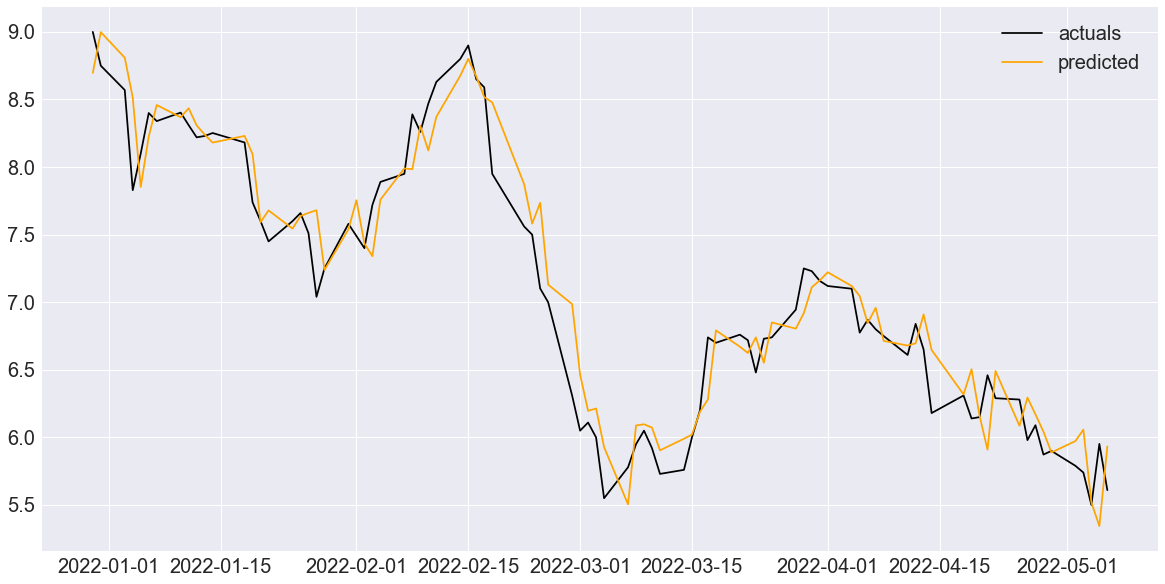

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['curlf_next_close'], color='black')
ax.plot(y_test0['curlf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## CURLF and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_curlf, df_etfs, on='Date', how='left')
df1

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946       8.500      5.824        5.850         47400   
2018-10-30       5.655       6.560      5.653        6.560         99900   
2018-10-31       6.725       7.400      6.723        7.210        207500   
2018-11-01       7.577       8.500      7.364        8.409        457000   
2018-11-02       8.557       9.800      8.047        8.434        354000   
...                ...         ...        ...          ...           ...   
2022-05-03       6.000       6.000      5.590        5.790        489200   
2022-05-04       5.950       5.950      5.470        5.740        715300   
2022-05-05       6.000       6.000      5.380        5.500        490700   
2022-05-06       5.320       5.952      5.140        5.952        539500   
2022-05-09       5.940       5.940      5.370        5.610        489700   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29               NaN             6.560         NaN            NaN   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   
...                      ...               ...         ...            ...   
2022-05-03             5.900             5.740      -0.110      -0.018644   
2022-05-04             5.790             5.500      -0.050      -0.008636   
2022-05-05             5.740             5.952      -0.240      -0.041812   
2022-05-06             5.500             5.610       0.452       0.082182   
2022-05-09             5.952               NaN      -0.342      -0.057460   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                   NaN                  NaN                    NaN   
2018-10-30                   NaN                  NaN                    NaN   
2018-10-31                   NaN                  NaN                    NaN   
2018-11-01                   NaN                  NaN                    NaN   
2018-11-02                7.2926                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                5.9266              -0.0980                 6.0953   
2022-05-04                5.8786              -0.0480                 6.0553   
2022-05-05                5.7606              -0.1180                 5.9903   
2022-05-06                5.7764               0.0158                 5.9395   
2022-05-09                5.7184              -0.0580                 5.8715   

            curlf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-10-29                   NaN  32.380001  32.813999  28.610001  29.219999   
2018-10-30                   NaN  28.309999  30.270000  28.211000  29.740000   
2018-10-31                   NaN  30.440001  31.379999  30.028999  31.020000   
2018-11-01                   NaN  31.440001  31.999001  30.812000  31.809999   
2018-11-02                   NaN  32.049999  32.380001  31.570000  32.299999   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.0520   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.0400   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.0650   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.0508   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [41]:
df_isna1 = df1.isna()
df_isna1

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       False       False      False        False         False   
2018-10-30       False       False      False        False         False   
2018-10-31       False       False      False        False         False   
2018-11-01       False       False      False        False         False   
2018-11-02       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29              True             False        True           True   
2018-10-30             False             False       False          False   
2018-10-31             False             False       False          False   
2018-11-01             False             False       False          False   
2018-11-02             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                  True                 True                   True   
2018-10-30                  True                 True                   True   
2018-10-31                  True                 True                   True   
2018-11-01                  True                 True                   True   
2018-11-02                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            curlf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-10-29                  True    False    False   False     False   
2018-10-30                  True    False    False   False     False   
2018-10-31                  True    False    False   False     False   
2018-11-01                  True    False    False   False     False   
2018-11-02                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-03                 False    False    False   False     False   
2022-05-04                 False    False    False   False     False   
2022-05-05                 False    False    False   False     False   
2022-05-06                 False    False    False   False     False   
2022-05-09                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946        8.50      5.824        5.850         47400   
2018-10-30       5.655        6.56      5.653        6.560         99900   
2018-10-31       6.725        7.40      6.723        7.210        207500   
2018-11-01       7.577        8.50      7.364        8.409        457000   
2018-11-02       8.557        9.80      8.047        8.434        354000   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29             0.000             6.560       0.000       0.000000   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                0.0000                  0.0                    0.0   
2018-10-30                0.0000                  0.0                    0.0   
2018-10-31                0.0000                  0.0                    0.0   
2018-11-01                0.0000                  0.0                    0.0   
2018-11-02                7.2926                  0.0                    0.0   

            curlf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-10-29                   0.0  32.380001  32.813999  28.610001  29.219999   
2018-10-30                   0.0  28.309999  30.270000  28.211000  29.740000   
2018-10-31                   0.0  30.440001  31.379999  30.028999  31.020000   
2018-11-01                   0.0  31.440001  31.999001  30.812000  31.809999   
2018-11-02                   0.0  32.049999  32.380001  31.570000  32.299999   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-10-29    1206200      31.990000      29.740000 -2.770001   -0.086590   
2018-10-30     852000      29.219999      31.020000  0.520001    0.017796   
2018-10-31     865400      29.740000      31.809999  1.280000    0.043040   
2018-11-01     603800      31.020000      32.299999  0.789999    0.025467   
2018-11-02     606200      31.809999      33.419998  0.490000    0.015404   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-10-29          31.583999         -0.954001              34.942   
2018-10-30          30.930000         -0.654000              33.826   
2018-10-31          30.848000         -0.082000              32.957   
2018-11-01          30.756000         -0.092000              32.198   
2018-11-02          30.817999          0.062000              31.678   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-10-29             -1.326        0.0        0.0       0.0         0.0   
2018-10-30             -1.116        0.0        0.0       0.0         0.0   
2018-10-31             -0.869        0.0        0.0       0.0         0.0   
2018-11-01             -0.759        0.0        0.0       0.0         0.0   
2018-11-02             -0.520        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-10-29          0.0              0.0              0.0        0.0   
2018-10-30          0.0

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946       8.500      5.824        5.850         47400   
2018-10-30       5.655       6.560      5.653        6.560         99900   
2018-10-31       6.725       7.400      6.723        7.210        207500   
2018-11-01       7.577       8.500      7.364        8.409        457000   
2018-11-02       8.557       9.800      8.047        8.434        354000   
...                ...         ...        ...          ...           ...   
2022-05-03       6.000       6.000      5.590        5.790        489200   
2022-05-04       5.950       5.950      5.470        5.740        715300   
2022-05-05       6.000       6.000      5.380        5.500        490700   
2022-05-06       5.320       5.952      5.140        5.952        539500   
2022-05-09       5.940       5.940      5.370        5.610        489700   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29             0.000             6.560       0.000       0.000000   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   
...                      ...               ...         ...            ...   
2022-05-03             5.900             5.740      -0.110      -0.018644   
2022-05-04             5.790             5.500      -0.050      -0.008636   
2022-05-05             5.740             5.952      -0.240      -0.041812   
2022-05-06             5.500             5.610       0.452       0.082182   
2022-05-09             5.952             0.000      -0.342      -0.057460   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                0.0000               0.0000                 0.0000   
2018-10-30                0.0000               0.0000                 0.0000   
2018-10-31                0.0000               0.0000                 0.0000   
2018-11-01                0.0000               0.0000                 0.0000   
2018-11-02                7.2926               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03                5.9266              -0.0980                 6.0953   
2022-05-04                5.8786              -0.0480                 6.0553   
2022-05-05                5.7606              -0.1180                 5.9903   
2022-05-06                5.7764               0.0158                 5.9395   
2022-05-09                5.7184              -0.0580                 5.8715   

            curlf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-10-29                0.0000  32.380001  32.813999  28.610001  29.219999   
2018-10-30                0.0000  28.309999  30.270000  28.211000  29.740000   
2018-10-31                0.0000  30.440001  31.379999  30.028999  31.020000   
2018-11-01                0.0000  31.440001  31.999001  30.812000  31.809999   
2018-11-02                0.0000  32.049999  32.380001  31.570000  32.299999   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.0520   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.0400   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.0650   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.0508   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'curlf_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2018-10-29     10   29  2018        4       7.946       8.500      5.824   
2018-10-30     10   30  2018        4       5.655       6.560      5.653   
2018-10-31     10   31  2018        4       6.725       7.400      6.723   
2018-11-01     11    1  2018        4       7.577       8.500      7.364   
2018-11-02     11    2  2018        4       8.557       9.800      8.047   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-03      5    3  2022        2       6.000       6.000      5.590   
2022-05-04      5    4  2022        2       5.950       5.950      5.470   
2022-05-05      5    5  2022        2       6.000       6.000      5.380   
2022-05-06      5    6  2022        2       5.320       5.952      5.140   
2022-05-09      5    9  2022        2       5.940       5.940      5.370   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_next_close  \
Date                                                                        
2018-10-29        5.850         47400             0.000             6.560   
2018-10-30        6.560         99900             5.850             7.210   
2018-10-31        7.210        207500             6.560             8.409   
2018-11-01        8.409        457000             7.210             8.434   
2018-11-02        8.434        354000             8.409             8.120   
...                 ...           ...               ...               ...   
2022-05-03        5.790        489200             5.900             5.740   
2022-05-04        5.740        715300             5.790             5.500   
2022-05-05        5.500        490700             5.740             5.952   
2022-05-06        5.952        539500             5.500             5.610   
2022-05-09        5.610        489700             5.952             0.000   

            curlf_diff  curlf_%change  curlf_5day_avg_close  \
Date                                                          
2018-10-29       0.000       0.000000                0.0000   
2018-10-30       0.710       0.121368                0.0000   
2018-10-31       0.650       0.099085                0.0000   
2018-11-01       1.199       0.166297                0.0000   
2018-11-02       0.025       0.002973                7.2926   
...                ...            ...                   ...   
2022-05-03      -0.110      -0.018644                5.9266   
2022-05-04      -0.050      -0.008636                5.8786   
2022-05-05      -0.240      -0.041812                5.7606   
2022-05-06       0.452       0.082182                5.7764   
2022-05-09      -0.342      -0.057460                5.7184   

            curlf_5day_avg_diff  curlf_10day_avg_close  curlf_10day_avg_diff  \
Date                                                                           
2018-10-29               0.0000                 0.0000                0.0000   
2018-10-30               0.0000                 0.0000                0.0000   
2018-10-31               0.0000                 0.0000                0.0000   
2018-11-01               0.0000                 0.0000                0.0000   
2018-11-02               0.0000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-03              -0.0980                 6.0953               -0.0520   
2022-05-04              -0.0480                 6.0553               -0.0400   
2022-05-05              -0.1180                 5.9903               -0.0650   
2022-05-06               0.0158                 5.9395               -0.0508   
2022-05-09              -0.0580                 5.8715               -0.0680   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-10-29  32.380001 

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

798

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

798
89


In [52]:
X_train1 = train1.drop('curlf_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2018-10-29     10   29  2018        4       7.946        8.50      5.824   
2018-10-30     10   30  2018        4       5.655        6.56      5.653   
2018-10-31     10   31  2018        4       6.725        7.40      6.723   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_diff  \
Date                                                                  
2018-10-29         5.85         47400              0.00        0.00   
2018-10-30         6.56         99900              5.85        0.71   
2018-10-31         7.21        207500              6.56        0.65   

            curlf_%change  curlf_5day_avg_close  curlf_5day_avg_diff  \
Date                                                                   
2018-10-29       0.000000                   0.0                  0.0   
2018-10-30       0.121368                   0.0                  0.0   
2018-10-31       0.099085                   0.0                  0.0   

            curlf_10day_avg_close  curlf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-10-29                    0.0                   0.0  32.380001  32.813999   
2018-10-30                    0.0                   0.0  28.309999  30.270000   
2018-10-31                    0.0                   0.0  30.440001  31.379999   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2018-10-29  28.610001  29.219999    1206200      31.990000      29.740000   
2018-10-30  28.211000  29.740000     852000      29.219999      31.020000   
2018-10-31  30.028999  31.020000     865400      29.740000      31.809999   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-10-29 -2.770001   -0.086590          31.583999         -0.954001   
2018-10-30  0.520001    0.017796          30.930000         -0.654000   
2018-10-31  1.280000    0.043040          30.848000         -0.082000   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-10-29              34.942             -1.326        0.0        0.0   
2018-10-30              33.826             -1.116        0.0        0.0   
2018-10-31              32.957             -0.869        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-10-29       0.0         0.0          0.0              0.0   
2018-10-30       0.0         0.0          0.0              0.0   
2018-10-31       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-10-29              0.0        0.0           0.0                  0.0   
2018-10-30              0.0        0.0           0.0                  0.0   
2018-10-31              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-10-29                 0.0                   0.0                  0.0   
2018-10-30                 0.0                   0.0                  0.0   
2018-10-31                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-10-29        0.0        0.0       0.0         0.0          0.0   
2018-10-30        0.0        0.0       0.0         0.0          

In [53]:
X_train1.shape

(798, 159)

In [54]:
y_train1 = train1['curlf_next_close']
y_train1.head(3)

Date
2018-10-29    6.560
2018-10-30    7.210
2018-10-31    8.409
Name: curlf_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2021-12-27    8.500
2021-12-28    8.210
2021-12-29    8.673
Name: curlf_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('curlf_next_close', axis=1)
y_test1 = test1['curlf_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2021-12-30     12   30  2021        4        8.00       8.750      8.000   
2021-12-31     12   31  2021        4        8.52       9.036      8.420   
2022-01-03      1    3  2022        1        8.99       9.450      8.642   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_diff  \
Date                                                                  
2021-12-30        8.673        856500             8.210       0.463   
2021-12-31        9.000        814500             8.673       0.327   
2022-01-03        8.750        448700             9.000      -0.250   

            curlf_%change  curlf_5day_avg_close  curlf_5day_avg_diff  \
Date                                                                   
2021-12-30       0.056395                8.5866               0.0146   
2021-12-31       0.037703                8.6146               0.0280   
2022-01-03      -0.027778                8.6266               0.0120   

            curlf_10day_avg_close  curlf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2021-12-30                 8.5503               -0.0417    11.08    11.45   
2021-12-31                 8.5623                0.0120    11.13    11.38   
2022-01-03                 8.5773                0.0150    11.21    11.59   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2021-12-30   11.06     11.21    1813000          11.05          11.08   
2021-12-31   11.07     11.08    1386300          11.21          11.43   
2022-01-03   11.09     11.43    1204900          11.08          11.29   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2021-12-30     0.16    0.014480             11.386            -0.048   
2021-12-31    -0.13   -0.011597             11.246            -0.140   
2022-01-03     0.35    0.031588             11.210            -0.036   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-12-30              11.365             -0.009      25.01      25.76   
2021-12-31              11.351             -0.014      25.50      25.65   
2022-01-03              11.346             -0.005      25.93      26.51   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2021-12-30  24.990000   25.469999    1395900.0        25.040001   
2021-12-31  25.139999   25.590000    1376000.0        25.469999   
2022-01-03  25.709999   25.790001    1431400.0        25.590000   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-12-30        25.590000   0.429998      0.017172            25.172001   
2021-12-31        25.790001   0.120001      0.004711            25.218000   
2022-01-03        24.780001   0.200001      0.007816            25.318000   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-12-30               0.182                24.551                0.094   
2021-12-31               0.046                24.699                0.148   
2022-01-03               0.100                24.868                0.169   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2021-12-30      12.84     13.200    12.804       12.99     180000.0   
2021-12-31      13.08     13.140    12.940       13.00     245300.0   
2022-01-03      12.96     13.341 

In [58]:
X_test1.shape

(89, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-04    5.500
2022-05-05    5.952
2022-05-06    5.610
Name: curlf_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([8.95633864, 9.07420246, 8.52464235, 8.01621404, 8.06240288])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.18306535112489278


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.1421348662929473


In [64]:
hyper_table.append(dict(version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

In [65]:
y_train1 = pd.DataFrame(y_train1, columns=['curlf_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['curlf_next_close'])

In [66]:
y_test1['curlf_pred_next_close'] = y_pred1

In [67]:
y_test1.tail()

curlf_next_close  curlf_pred_next_close
Date                                               
2022-05-02             5.790               5.762715
2022-05-03             5.740               5.752358
2022-05-04             5.500               5.291975
2022-05-05             5.952               5.547528
2022-05-06             5.610               5.668358

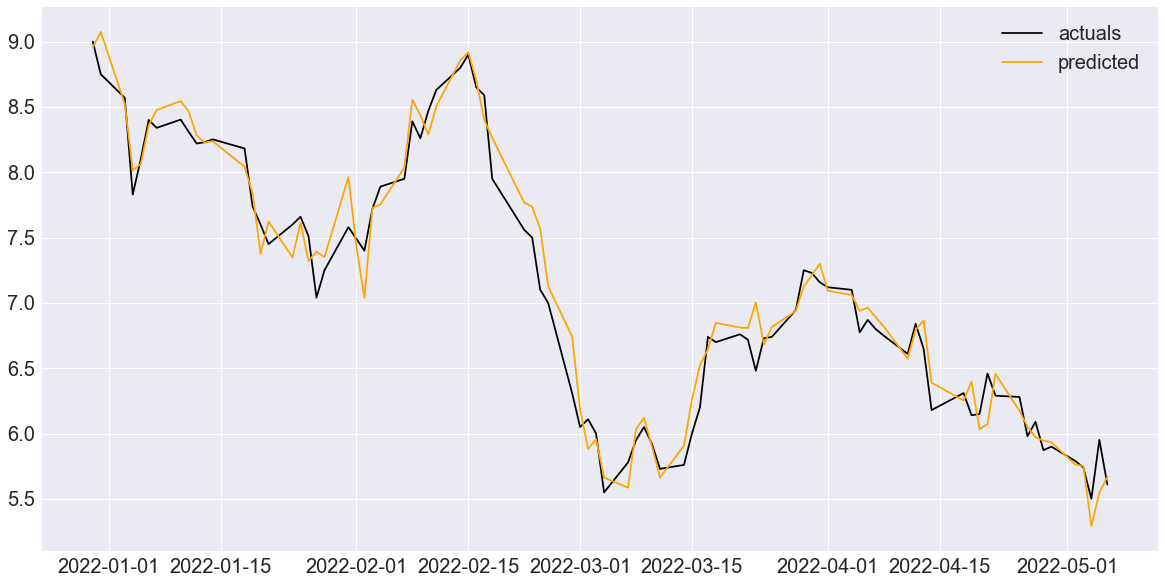

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['curlf_next_close'], color='black')
ax.plot(y_test1['curlf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## CURLF, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_curlf, df_etfs_dow, on='Date', how='left')
df2

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946       8.500      5.824        5.850         47400   
2018-10-30       5.655       6.560      5.653        6.560         99900   
2018-10-31       6.725       7.400      6.723        7.210        207500   
2018-11-01       7.577       8.500      7.364        8.409        457000   
2018-11-02       8.557       9.800      8.047        8.434        354000   
...                ...         ...        ...          ...           ...   
2022-05-03       6.000       6.000      5.590        5.790        489200   
2022-05-04       5.950       5.950      5.470        5.740        715300   
2022-05-05       6.000       6.000      5.380        5.500        490700   
2022-05-06       5.320       5.952      5.140        5.952        539500   
2022-05-09       5.940       5.940      5.370        5.610        489700   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29               NaN             6.560         NaN            NaN   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   
...                      ...               ...         ...            ...   
2022-05-03             5.900             5.740      -0.110      -0.018644   
2022-05-04             5.790             5.500      -0.050      -0.008636   
2022-05-05             5.740             5.952      -0.240      -0.041812   
2022-05-06             5.500             5.610       0.452       0.082182   
2022-05-09             5.952               NaN      -0.342      -0.057460   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                   NaN                  NaN                    NaN   
2018-10-30                   NaN                  NaN                    NaN   
2018-10-31                   NaN                  NaN                    NaN   
2018-11-01                   NaN                  NaN                    NaN   
2018-11-02                7.2926                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                5.9266              -0.0980                 6.0953   
2022-05-04                5.8786              -0.0480                 6.0553   
2022-05-05                5.7606              -0.1180                 5.9903   
2022-05-06                5.7764               0.0158                 5.9395   
2022-05-09                5.7184              -0.0580                 5.8715   

            curlf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-10-29                   NaN  32.380001  32.813999  28.610001  29.219999   
2018-10-30                   NaN  28.309999  30.270000  28.211000  29.740000   
2018-10-31                   NaN  30.440001  31.379999  30.028999  31.020000   
2018-11-01                   NaN  31.440001  31.999001  30.812000  31.809999   
2018-11-02                   NaN  32.049999  32.380001  31.570000  32.299999   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.0520   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.0400   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.0650   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.0508   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [71]:
df_isna2 = df2.isna()
df_isna2

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       False       False      False        False         False   
2018-10-30       False       False      False        False         False   
2018-10-31       False       False      False        False         False   
2018-11-01       False       False      False        False         False   
2018-11-02       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29              True             False        True           True   
2018-10-30             False             False       False          False   
2018-10-31             False             False       False          False   
2018-11-01             False             False       False          False   
2018-11-02             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                  True                 True                   True   
2018-10-30                  True                 True                   True   
2018-10-31                  True                 True                   True   
2018-11-01                  True                 True                   True   
2018-11-02                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            curlf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-10-29                  True    False    False   False     False   
2018-10-30                  True    False    False   False     False   
2018-10-31                  True    False    False   False     False   
2018-11-01                  True    False    False   False     False   
2018-11-02                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-03                 False    False    False   False     False   
2022-05-04                 False    False    False   False     False   
2022-05-05                 False    False    False   False     False   
2022-05-06                 False    False    False   False     False   
2022-05-09                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946        8.50      5.824        5.850         47400   
2018-10-30       5.655        6.56      5.653        6.560         99900   
2018-10-31       6.725        7.40      6.723        7.210        207500   
2018-11-01       7.577        8.50      7.364        8.409        457000   
2018-11-02       8.557        9.80      8.047        8.434        354000   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29             0.000             6.560       0.000       0.000000   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                0.0000                  0.0                    0.0   
2018-10-30                0.0000                  0.0                    0.0   
2018-10-31                0.0000                  0.0                    0.0   
2018-11-01                0.0000                  0.0                    0.0   
2018-11-02                7.2926                  0.0                    0.0   

            curlf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-10-29                   0.0  32.380001  32.813999  28.610001  29.219999   
2018-10-30                   0.0  28.309999  30.270000  28.211000  29.740000   
2018-10-31                   0.0  30.440001  31.379999  30.028999  31.020000   
2018-11-01                   0.0  31.440001  31.999001  30.812000  31.809999   
2018-11-02                   0.0  32.049999  32.380001  31.570000  32.299999   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-10-29    1206200      31.990000      29.740000 -2.770001   -0.086590   
2018-10-30     852000      29.219999      31.020000  0.520001    0.017796   
2018-10-31     865400      29.740000      31.809999  1.280000    0.043040   
2018-11-01     603800      31.020000      32.299999  0.789999    0.025467   
2018-11-02     606200      31.809999      33.419998  0.490000    0.015404   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-10-29          31.583999         -0.954001              34.942   
2018-10-30          30.930000         -0.654000              33.826   
2018-10-31          30.848000         -0.082000              32.957   
2018-11-01          30.756000         -0.092000              32.198   
2018-11-02          30.817999          0.062000              31.678   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-10-29             -1.326        0.0        0.0       0.0         0.0   
2018-10-30             -1.116        0.0        0.0       0.0         0.0   
2018-10-31             -0.869        0.0        0.0       0.0         0.0   
2018-11-01             -0.759        0.0        0.0       0.0         0.0   
2018-11-02             -0.520        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-10-29          0.0              0.0              0.0        0.0   
2018-10-30          0.0

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

curlf_Open  curlf_High  curlf_Low  curlf_Close  curlf_Volume  \
Date                                                                       
2018-10-29       7.946       8.500      5.824        5.850         47400   
2018-10-30       5.655       6.560      5.653        6.560         99900   
2018-10-31       6.725       7.400      6.723        7.210        207500   
2018-11-01       7.577       8.500      7.364        8.409        457000   
2018-11-02       8.557       9.800      8.047        8.434        354000   
...                ...         ...        ...          ...           ...   
2022-05-03       6.000       6.000      5.590        5.790        489200   
2022-05-04       5.950       5.950      5.470        5.740        715300   
2022-05-05       6.000       6.000      5.380        5.500        490700   
2022-05-06       5.320       5.952      5.140        5.952        539500   
2022-05-09       5.940       5.940      5.370        5.610        489700   

            curlf_prev_close  curlf_next_close  curlf_diff  curlf_%change  \
Date                                                                        
2018-10-29             0.000             6.560       0.000       0.000000   
2018-10-30             5.850             7.210       0.710       0.121368   
2018-10-31             6.560             8.409       0.650       0.099085   
2018-11-01             7.210             8.434       1.199       0.166297   
2018-11-02             8.409             8.120       0.025       0.002973   
...                      ...               ...         ...            ...   
2022-05-03             5.900             5.740      -0.110      -0.018644   
2022-05-04             5.790             5.500      -0.050      -0.008636   
2022-05-05             5.740             5.952      -0.240      -0.041812   
2022-05-06             5.500             5.610       0.452       0.082182   
2022-05-09             5.952             0.000      -0.342      -0.057460   

            curlf_5day_avg_close  curlf_5day_avg_diff  curlf_10day_avg_close  \
Date                                                                           
2018-10-29                0.0000               0.0000                 0.0000   
2018-10-30                0.0000               0.0000                 0.0000   
2018-10-31                0.0000               0.0000                 0.0000   
2018-11-01                0.0000               0.0000                 0.0000   
2018-11-02                7.2926               0.0000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03                5.9266              -0.0980                 6.0953   
2022-05-04                5.8786              -0.0480                 6.0553   
2022-05-05                5.7606              -0.1180                 5.9903   
2022-05-06                5.7764               0.0158                 5.9395   
2022-05-09                5.7184              -0.0580                 5.8715   

            curlf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-10-29                0.0000  32.380001  32.813999  28.610001  29.219999   
2018-10-30                0.0000  28.309999  30.270000  28.211000  29.740000   
2018-10-31                0.0000  30.440001  31.379999  30.028999  31.020000   
2018-11-01                0.0000  31.440001  31.999001  30.812000  31.809999   
2018-11-02                0.0000  32.049999  32.380001  31.570000  32.299999   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.0520   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.0400   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.0650   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.0508   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'curlf_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2018-10-29     10   29  2018        4       7.946       8.500      5.824   
2018-10-30     10   30  2018        4       5.655       6.560      5.653   
2018-10-31     10   31  2018        4       6.725       7.400      6.723   
2018-11-01     11    1  2018        4       7.577       8.500      7.364   
2018-11-02     11    2  2018        4       8.557       9.800      8.047   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-03      5    3  2022        2       6.000       6.000      5.590   
2022-05-04      5    4  2022        2       5.950       5.950      5.470   
2022-05-05      5    5  2022        2       6.000       6.000      5.380   
2022-05-06      5    6  2022        2       5.320       5.952      5.140   
2022-05-09      5    9  2022        2       5.940       5.940      5.370   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_next_close  \
Date                                                                        
2018-10-29        5.850         47400             0.000             6.560   
2018-10-30        6.560         99900             5.850             7.210   
2018-10-31        7.210        207500             6.560             8.409   
2018-11-01        8.409        457000             7.210             8.434   
2018-11-02        8.434        354000             8.409             8.120   
...                 ...           ...               ...               ...   
2022-05-03        5.790        489200             5.900             5.740   
2022-05-04        5.740        715300             5.790             5.500   
2022-05-05        5.500        490700             5.740             5.952   
2022-05-06        5.952        539500             5.500             5.610   
2022-05-09        5.610        489700             5.952             0.000   

            curlf_diff  curlf_%change  curlf_5day_avg_close  \
Date                                                          
2018-10-29       0.000       0.000000                0.0000   
2018-10-30       0.710       0.121368                0.0000   
2018-10-31       0.650       0.099085                0.0000   
2018-11-01       1.199       0.166297                0.0000   
2018-11-02       0.025       0.002973                7.2926   
...                ...            ...                   ...   
2022-05-03      -0.110      -0.018644                5.9266   
2022-05-04      -0.050      -0.008636                5.8786   
2022-05-05      -0.240      -0.041812                5.7606   
2022-05-06       0.452       0.082182                5.7764   
2022-05-09      -0.342      -0.057460                5.7184   

            curlf_5day_avg_diff  curlf_10day_avg_close  curlf_10day_avg_diff  \
Date                                                                           
2018-10-29               0.0000                 0.0000                0.0000   
2018-10-30               0.0000                 0.0000                0.0000   
2018-10-31               0.0000                 0.0000                0.0000   
2018-11-01               0.0000                 0.0000                0.0000   
2018-11-02               0.0000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-03              -0.0980                 6.0953               -0.0520   
2022-05-04              -0.0480                 6.0553               -0.0400   
2022-05-05              -0.1180                 5.9903               -0.0650   
2022-05-06               0.0158                 5.9395               -0.0508   
2022-05-09              -0.0580                 5.8715               -0.0680   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-10-29  32.380001 

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

798

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

798
89


In [82]:
X_train2 = train2.drop('curlf_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2018-10-29     10   29  2018        4       7.946        8.50      5.824   
2018-10-30     10   30  2018        4       5.655        6.56      5.653   
2018-10-31     10   31  2018        4       6.725        7.40      6.723   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_diff  \
Date                                                                  
2018-10-29         5.85         47400              0.00        0.00   
2018-10-30         6.56         99900              5.85        0.71   
2018-10-31         7.21        207500              6.56        0.65   

            curlf_%change  curlf_5day_avg_close  curlf_5day_avg_diff  \
Date                                                                   
2018-10-29       0.000000                   0.0                  0.0   
2018-10-30       0.121368                   0.0                  0.0   
2018-10-31       0.099085                   0.0                  0.0   

            curlf_10day_avg_close  curlf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-10-29                    0.0                   0.0  32.380001  32.813999   
2018-10-30                    0.0                   0.0  28.309999  30.270000   
2018-10-31                    0.0                   0.0  30.440001  31.379999   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2018-10-29  28.610001  29.219999    1206200      31.990000      29.740000   
2018-10-30  28.211000  29.740000     852000      29.219999      31.020000   
2018-10-31  30.028999  31.020000     865400      29.740000      31.809999   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-10-29 -2.770001   -0.086590          31.583999         -0.954001   
2018-10-30  0.520001    0.017796          30.930000         -0.654000   
2018-10-31  1.280000    0.043040          30.848000         -0.082000   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-10-29              34.942             -1.326        0.0        0.0   
2018-10-30              33.826             -1.116        0.0        0.0   
2018-10-31              32.957             -0.869        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-10-29       0.0         0.0          0.0              0.0   
2018-10-30       0.0         0.0          0.0              0.0   
2018-10-31       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-10-29              0.0        0.0           0.0                  0.0   
2018-10-30              0.0        0.0           0.0                  0.0   
2018-10-31              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-10-29                 0.0                   0.0                  0.0   
2018-10-30                 0.0                   0.0                  0.0   
2018-10-31                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-10-29        0.0        0.0       0.0         0.0          0.0   
2018-10-30        0.0        0.0       0.0         0.0          

In [83]:
X_train2.shape

(798, 185)

In [84]:
y_train2 = train2['curlf_next_close']
y_train2.head(3)

Date
2018-10-29    6.560
2018-10-30    7.210
2018-10-31    8.409
Name: curlf_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2021-12-27    8.500
2021-12-28    8.210
2021-12-29    8.673
Name: curlf_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('curlf_next_close', axis=1)
y_test2 = test2['curlf_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  curlf_Open  curlf_High  curlf_Low  \
Date                                                                       
2021-12-30     12   30  2021        4        8.00       8.750      8.000   
2021-12-31     12   31  2021        4        8.52       9.036      8.420   
2022-01-03      1    3  2022        1        8.99       9.450      8.642   

            curlf_Close  curlf_Volume  curlf_prev_close  curlf_diff  \
Date                                                                  
2021-12-30        8.673        856500             8.210       0.463   
2021-12-31        9.000        814500             8.673       0.327   
2022-01-03        8.750        448700             9.000      -0.250   

            curlf_%change  curlf_5day_avg_close  curlf_5day_avg_diff  \
Date                                                                   
2021-12-30       0.056395                8.5866               0.0146   
2021-12-31       0.037703                8.6146               0.0280   
2022-01-03      -0.027778                8.6266               0.0120   

            curlf_10day_avg_close  curlf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2021-12-30                 8.5503               -0.0417    11.08    11.45   
2021-12-31                 8.5623                0.0120    11.13    11.38   
2022-01-03                 8.5773                0.0150    11.21    11.59   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2021-12-30   11.06     11.21    1813000          11.05          11.08   
2021-12-31   11.07     11.08    1386300          11.21          11.43   
2022-01-03   11.09     11.43    1204900          11.08          11.29   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2021-12-30     0.16    0.014480             11.386            -0.048   
2021-12-31    -0.13   -0.011597             11.246            -0.140   
2022-01-03     0.35    0.031588             11.210            -0.036   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-12-30              11.365             -0.009      25.01      25.76   
2021-12-31              11.351             -0.014      25.50      25.65   
2022-01-03              11.346             -0.005      25.93      26.51   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2021-12-30  24.990000   25.469999    1395900.0        25.040001   
2021-12-31  25.139999   25.590000    1376000.0        25.469999   
2022-01-03  25.709999   25.790001    1431400.0        25.590000   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-12-30        25.590000   0.429998      0.017172            25.172001   
2021-12-31        25.790001   0.120001      0.004711            25.218000   
2022-01-03        24.780001   0.200001      0.007816            25.318000   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-12-30               0.182                24.551                0.094   
2021-12-31               0.046                24.699                0.148   
2022-01-03               0.100                24.868                0.169   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2021-12-30      12.84     13.200    12.804       12.99     180000.0   
2021-12-31      13.08     13.140    12.940       13.00     245300.0   
2022-01-03      12.96     13.341 

In [88]:
X_test2.shape

(89, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-04    5.500
2022-05-05    5.952
2022-05-06    5.610
Name: curlf_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([8.92100594, 9.02442511, 8.52602137, 7.97192327, 7.97349528])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.1955584362404648


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.1465615115045988


In [94]:
hyper_table.append(dict(version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

In [95]:
y_train2 = pd.DataFrame(y_train2, columns=['curlf_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['curlf_next_close'])

In [96]:
y_test2['curlf_pred_next_close'] = y_pred2

In [97]:
y_test2.tail()

curlf_next_close  curlf_pred_next_close
Date                                               
2022-05-02             5.790               5.822466
2022-05-03             5.740               5.868263
2022-05-04             5.500               5.231044
2022-05-05             5.952               5.513325
2022-05-06             5.610               5.576549

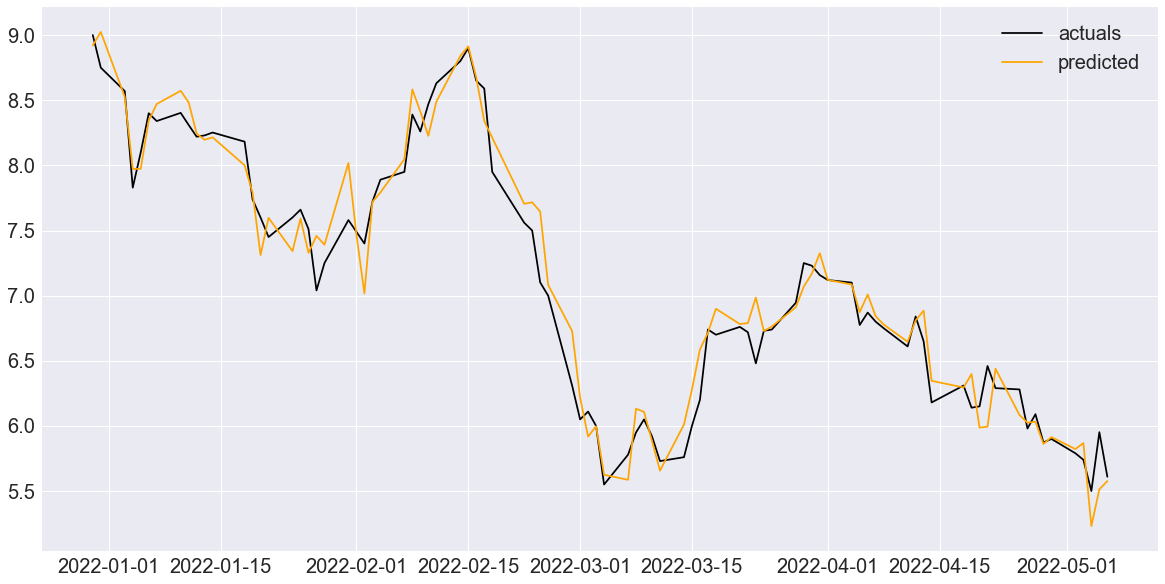

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['curlf_next_close'], color='black')
ax.plot(y_test2['curlf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CURLF target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   
2018-11-01     11    1  2018        4  37.230000  38.278000  35.849998   
2018-11-02     11    2  2018        4  37.430000  38.174999  35.869999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   
2018-11-01  37.029999     8829000       36.889999       37.139999  0.140000   
2018-11-02  37.139999     6357400       37.029999       40.090000  0.110000   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   
2018-11-01     0.003795              35.932          -0.488000   
2018-11-02     0.002971              35.620          -0.312000   
...                 ...                 ...                ...   
2022-05-03     0.001653               5.700           0.152000   
2022-05-04     0.100660               5.988           0.288000   
2022-05-05    -0.089955               6.112           0.124000   
2022-05-06    -0.016474               6.164           0.052000   
2022-05-09    -0.070352               6.064          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382        0.00       0.000   
2018-10-30            41.202999              -1.904        0.00       0.000   
2018-10-31            39.822999              -1.380        0.00       0.000   
2018-11-01            38.634999              -1.188        0.00       0.000   
2018-11-02            37.663999              -0.971        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03             5.642000               0.013        4.50       4.750   
2022-05-04             5.736000               0.094        4.22       4.414   
2022-05-05             5.768000               0.032        4.20       4.250   
2022-05-06             5.808000               0.040        3.92       4.340   
2022-05-09             5.806000              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

798

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

798
89


In [112]:
X_train3 = train3.drop('curlf_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382         0.0         0.0   
2018-10-30            41.202999              -1.904         0.0         0.0   
2018-10-31            39.822999              -1.380         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-10-29        0.0          0.0           0.0               0.0   
2018-10-30        0.0          0.0           0.0               0.0   
2018-10-31        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-10-29               0.0         0.0            0.0                   0.0   
2018-10-30               0.0         0.0            0.0                   0.0   
2018-10-31               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-10-29                  0.0                    0.0                   0.0   
2018-10-30                  0.0                    0.0                   0.0   
2018-10-31                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-10-29       7.94      8.040       6.6        6.80   11982700.0   
2018-10-30       6.50      7.263       6.5        7.05    7104600.0   
2018-10-31       7.28      7.629       7.1        7.42    8298700.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-10-29             7.78             7.05      -0.98     -0.125964   
2018-10-30             6.80             7.42       0.25      0.036765   
2018-10-31             7.05             7.70       0.37      0.052482   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-10-29                7.732              -0.344                 8.978   
2018-10-30                7.474              -0.258                 8.531   
2018-10-31                7.432              -0.042                 8.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-10-29               -0.494       7.946        8.50      5.824   
2018-10-30               -0.447       5.65

In [113]:
X_train3.shape

(798, 263)

In [114]:
y_train3 = train3['curlf_next_close']
y_train3.head(3)

Date
2018-10-29    6.560
2018-10-30    7.210
2018-10-31    8.409
Name: curlf_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2021-12-27    8.500
2021-12-28    8.210
2021-12-29    8.673
Name: curlf_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('curlf_next_close', axis=1)
y_test3 = test3['curlf_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-30     12   30  2021        4      8.76     9.295    8.705       8.94   
2021-12-31     12   31  2021        4      8.91     9.190    8.720       8.73   
2022-01-03      1    3  2022        1      8.86     9.640    8.800       9.30   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-30     7548700            8.76            8.73      0.18     0.020548   
2021-12-31     6512800            8.94            9.30     -0.21    -0.023490   
2022-01-03     7155500            8.73            8.97      0.57     0.065292   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-30               9.158             -0.086                9.230   
2021-12-31               8.980             -0.178                9.189   
2022-01-03               8.950             -0.030                9.160   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-30              -0.033        6.65       6.788       6.30   
2021-12-31              -0.041        6.52       6.790       6.52   
2022-01-03              -0.029        6.67       7.270       6.67   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-30         6.66     1081900.0              6.61              6.67   
2021-12-31         6.67      769000.0              6.66              6.75   
2022-01-03         6.75      617200.0              6.67              6.55   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-30        0.05       0.007564                 6.658   
2021-12-31        0.01       0.001502                 6.664   
2022-01-03        0.08       0.011994                 6.638   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-30                0.052                 6.5669                -0.034   
2021-12-31                0.006                 6.5469                -0.020   
2022-01-03               -0.026                 6.5559                 0.009   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-30      3.795       4.18     3.792        4.01    4337300.0   
2021-12-31      3.970       4.13     3.910        3.92    3271300.0   
2022-01-03      3.990       4.29     3.940        4.20    2695300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-30             3.85             3.92       0.16      0.041558   
2021-12-31             4.01             4.20      -0.09     -0.022444   
2022-01-03             3.92             4.11       0.28      0.071429   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-30                4.052              -0.042                 4.115   
2021-12-31                3.984              -0.068                 4.108   
2022-01-03                3.988               0.004                 4.097   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-30               -0.010        8.00       8.750      8.000   
2021-12-31               -0.007        8.52       9.036      8

In [118]:
X_test3.shape

(89, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-04    5.500
2022-05-05    5.952
2022-05-06    5.610
Name: curlf_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([8.95442365, 9.15462988, 8.30616559, 8.10572217, 7.92424682])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.22864158446369923


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.17684746130121862


In [124]:
hyper_table.append(dict(version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

In [125]:
y_train3 = pd.DataFrame(y_train3, columns=['curlf_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['curlf_next_close'])

In [126]:
y_test3['curlf_pred_next_close'] = y_pred3

In [127]:
y_test3.tail()

curlf_next_close  curlf_pred_next_close
Date                                               
2022-05-02             5.790               5.715614
2022-05-03             5.740               5.715537
2022-05-04             5.500               5.477115
2022-05-05             5.952               5.745591
2022-05-06             5.610               5.608268

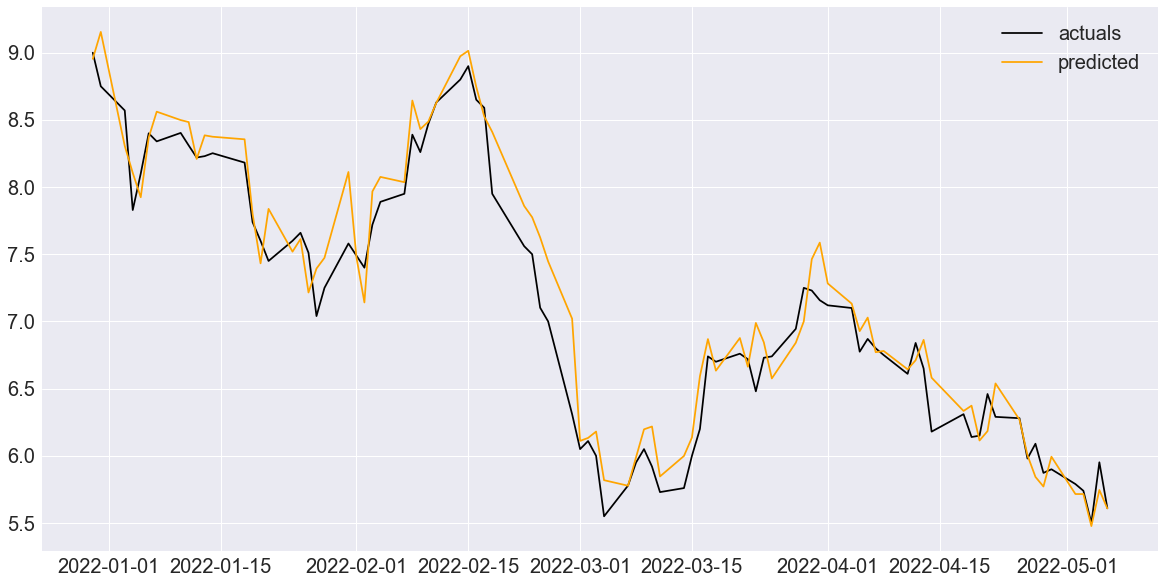

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['curlf_next_close'], color='black')
ax.plot(y_test3['curlf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CURLF target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   
2018-11-01     11    1  2018        4  37.230000  38.278000  35.849998   
2018-11-02     11    2  2018        4  37.430000  38.174999  35.869999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   
2018-11-01  37.029999     8829000       36.889999       37.139999  0.140000   
2018-11-02  37.139999     6357400       37.029999       40.090000  0.110000   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   
2018-11-01     0.003795              35.932          -0.488000   
2018-11-02     0.002971              35.620          -0.312000   
...                 ...                 ...                ...   
2022-05-03     0.001653               5.700           0.152000   
2022-05-04     0.100660               5.988           0.288000   
2022-05-05    -0.089955               6.112           0.124000   
2022-05-06    -0.016474               6.164           0.052000   
2022-05-09    -0.070352               6.064          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382        0.00       0.000   
2018-10-30            41.202999              -1.904        0.00       0.000   
2018-10-31            39.822999              -1.380        0.00       0.000   
2018-11-01            38.634999              -1.188        0.00       0.000   
2018-11-02            37.663999              -0.971        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03             5.642000               0.013        4.50       4.750   
2022-05-04             5.736000               0.094        4.22       4.414   
2022-05-05             5.768000               0.032        4.20       4.250   
2022-05-06             5.808000               0.040        3.92       4.340   
2022-05-09             5.806000              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

798

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

798
89


In [142]:
X_train4 = train4.drop('curlf_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382         0.0         0.0   
2018-10-30            41.202999              -1.904         0.0         0.0   
2018-10-31            39.822999              -1.380         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-10-29        0.0          0.0           0.0               0.0   
2018-10-30        0.0          0.0           0.0               0.0   
2018-10-31        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-10-29               0.0         0.0            0.0                   0.0   
2018-10-30               0.0         0.0            0.0                   0.0   
2018-10-31               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-10-29                  0.0                    0.0                   0.0   
2018-10-30                  0.0                    0.0                   0.0   
2018-10-31                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-10-29       7.94      8.040       6.6        6.80   11982700.0   
2018-10-30       6.50      7.263       6.5        7.05    7104600.0   
2018-10-31       7.28      7.629       7.1        7.42    8298700.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-10-29             7.78             7.05      -0.98     -0.125964   
2018-10-30             6.80             7.42       0.25      0.036765   
2018-10-31             7.05             7.70       0.37      0.052482   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-10-29                7.732              -0.344                 8.978   
2018-10-30                7.474              -0.258                 8.531   
2018-10-31                7.432              -0.042                 8.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-10-29               -0.494       7.946        8.50      5.824   
2018-10-30               -0.447       5.65

In [143]:
X_train4.shape

(798, 289)

In [144]:
y_train4 = train4['curlf_next_close']
y_train4.head(3)

Date
2018-10-29    6.560
2018-10-30    7.210
2018-10-31    8.409
Name: curlf_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2021-12-27    8.500
2021-12-28    8.210
2021-12-29    8.673
Name: curlf_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('curlf_next_close', axis=1)
y_test4 = test4['curlf_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-30     12   30  2021        4      8.76     9.295    8.705       8.94   
2021-12-31     12   31  2021        4      8.91     9.190    8.720       8.73   
2022-01-03      1    3  2022        1      8.86     9.640    8.800       9.30   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-30     7548700            8.76            8.73      0.18     0.020548   
2021-12-31     6512800            8.94            9.30     -0.21    -0.023490   
2022-01-03     7155500            8.73            8.97      0.57     0.065292   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-30               9.158             -0.086                9.230   
2021-12-31               8.980             -0.178                9.189   
2022-01-03               8.950             -0.030                9.160   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-30              -0.033        6.65       6.788       6.30   
2021-12-31              -0.041        6.52       6.790       6.52   
2022-01-03              -0.029        6.67       7.270       6.67   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-30         6.66     1081900.0              6.61              6.67   
2021-12-31         6.67      769000.0              6.66              6.75   
2022-01-03         6.75      617200.0              6.67              6.55   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-30        0.05       0.007564                 6.658   
2021-12-31        0.01       0.001502                 6.664   
2022-01-03        0.08       0.011994                 6.638   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-30                0.052                 6.5669                -0.034   
2021-12-31                0.006                 6.5469                -0.020   
2022-01-03               -0.026                 6.5559                 0.009   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-30      3.795       4.18     3.792        4.01    4337300.0   
2021-12-31      3.970       4.13     3.910        3.92    3271300.0   
2022-01-03      3.990       4.29     3.940        4.20    2695300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-30             3.85             3.92       0.16      0.041558   
2021-12-31             4.01             4.20      -0.09     -0.022444   
2022-01-03             3.92             4.11       0.28      0.071429   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-30                4.052              -0.042                 4.115   
2021-12-31                3.984              -0.068                 4.108   
2022-01-03                3.988               0.004                 4.097   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-30               -0.010        8.00       8.750      8.000   
2021-12-31               -0.007        8.52       9.036      8

In [148]:
X_test4.shape

(89, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-04    5.500
2022-05-05    5.952
2022-05-06    5.610
Name: curlf_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([8.94009947, 9.11360848, 8.37536927, 8.22552347, 7.94909417])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.2491216219686634


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.19495889555101695


In [154]:
hyper_table.append(dict(version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

In [155]:
y_train4 = pd.DataFrame(y_train4, columns=['curlf_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['curlf_next_close'])

In [156]:
y_test4['curlf_pred_next_close'] = y_pred4

In [157]:
y_test4.tail()

curlf_next_close  curlf_pred_next_close
Date                                               
2022-05-02             5.790               5.835244
2022-05-03             5.740               5.807710
2022-05-04             5.500               5.577622
2022-05-05             5.952               5.731335
2022-05-06             5.610               5.681723

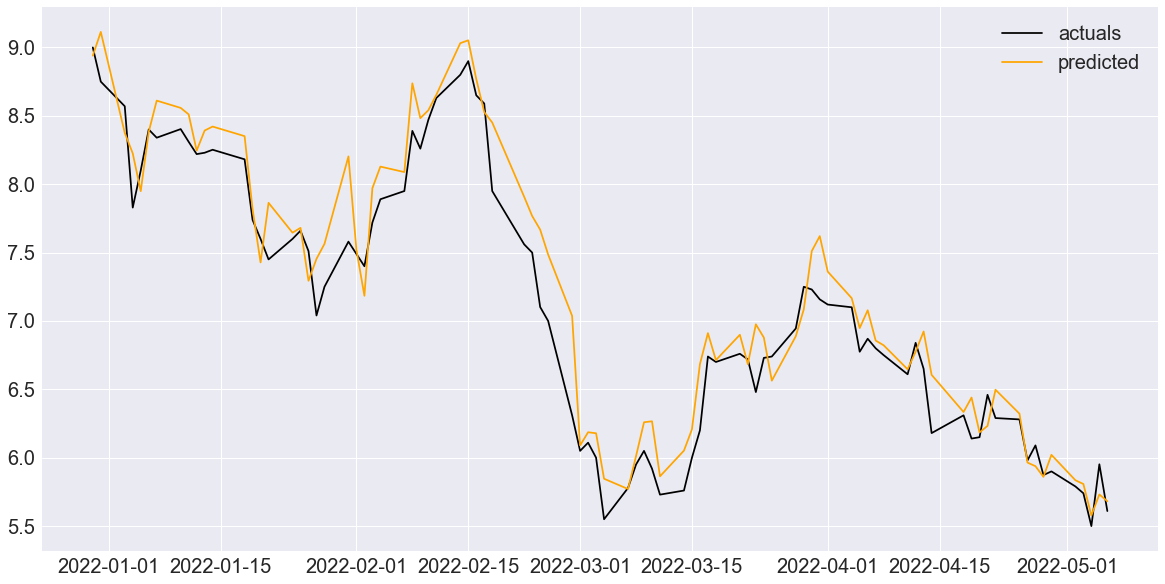

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['curlf_next_close'], color='black')
ax.plot(y_test4['curlf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CURLF target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   
2018-11-01     11    1  2018        4  37.230000  38.278000  35.849998   
2018-11-02     11    2  2018        4  37.430000  38.174999  35.869999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   
2018-11-01  37.029999     8829000       36.889999       37.139999  0.140000   
2018-11-02  37.139999     6357400       37.029999       40.090000  0.110000   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   
2018-11-01     0.003795              35.932          -0.488000   
2018-11-02     0.002971              35.620          -0.312000   
...                 ...                 ...                ...   
2022-05-03     0.001653               5.700           0.152000   
2022-05-04     0.100660               5.988           0.288000   
2022-05-05    -0.089955               6.112           0.124000   
2022-05-06    -0.016474               6.164           0.052000   
2022-05-09    -0.070352               6.064          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382        0.00       0.000   
2018-10-30            41.202999              -1.904        0.00       0.000   
2018-10-31            39.822999              -1.380        0.00       0.000   
2018-11-01            38.634999              -1.188        0.00       0.000   
2018-11-02            37.663999              -0.971        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03             5.642000               0.013        4.50       4.750   
2022-05-04             5.736000               0.094        4.22       4.414   
2022-05-05             5.768000               0.032        4.20       4.250   
2022-05-06             5.808000               0.040        3.92       4.340   
2022-05-09             5.806000              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

798

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

798
89


In [172]:
X_train5 = train5.drop('curlf_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382         0.0         0.0   
2018-10-30            41.202999              -1.904         0.0         0.0   
2018-10-31            39.822999              -1.380         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-10-29        0.0          0.0           0.0               0.0   
2018-10-30        0.0          0.0           0.0               0.0   
2018-10-31        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-10-29               0.0         0.0            0.0                   0.0   
2018-10-30               0.0         0.0            0.0                   0.0   
2018-10-31               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-10-29                  0.0                    0.0                   0.0   
2018-10-30                  0.0                    0.0                   0.0   
2018-10-31                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-10-29       7.94      8.040       6.6        6.80   11982700.0   
2018-10-30       6.50      7.263       6.5        7.05    7104600.0   
2018-10-31       7.28      7.629       7.1        7.42    8298700.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-10-29             7.78             7.05      -0.98     -0.125964   
2018-10-30             6.80             7.42       0.25      0.036765   
2018-10-31             7.05             7.70       0.37      0.052482   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-10-29                7.732              -0.344                 8.978   
2018-10-30                7.474              -0.258                 8.531   
2018-10-31                7.432              -0.042                 8.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-10-29               -0.494       7.946        8.50      5.824   
2018-10-30               -0.447       5.65

In [173]:
X_train5.shape

(798, 393)

In [174]:
y_train5 = train5['curlf_next_close']
y_train5.head(3)

Date
2018-10-29    6.560
2018-10-30    7.210
2018-10-31    8.409
Name: curlf_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2021-12-27    8.500
2021-12-28    8.210
2021-12-29    8.673
Name: curlf_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('curlf_next_close', axis=1)
y_test5 = test5['curlf_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-30     12   30  2021        4      8.76     9.295    8.705       8.94   
2021-12-31     12   31  2021        4      8.91     9.190    8.720       8.73   
2022-01-03      1    3  2022        1      8.86     9.640    8.800       9.30   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-30     7548700            8.76            8.73      0.18     0.020548   
2021-12-31     6512800            8.94            9.30     -0.21    -0.023490   
2022-01-03     7155500            8.73            8.97      0.57     0.065292   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-30               9.158             -0.086                9.230   
2021-12-31               8.980             -0.178                9.189   
2022-01-03               8.950             -0.030                9.160   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-30              -0.033        6.65       6.788       6.30   
2021-12-31              -0.041        6.52       6.790       6.52   
2022-01-03              -0.029        6.67       7.270       6.67   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-30         6.66     1081900.0              6.61              6.67   
2021-12-31         6.67      769000.0              6.66              6.75   
2022-01-03         6.75      617200.0              6.67              6.55   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-30        0.05       0.007564                 6.658   
2021-12-31        0.01       0.001502                 6.664   
2022-01-03        0.08       0.011994                 6.638   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-30                0.052                 6.5669                -0.034   
2021-12-31                0.006                 6.5469                -0.020   
2022-01-03               -0.026                 6.5559                 0.009   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-30      3.795       4.18     3.792        4.01    4337300.0   
2021-12-31      3.970       4.13     3.910        3.92    3271300.0   
2022-01-03      3.990       4.29     3.940        4.20    2695300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-30             3.85             3.92       0.16      0.041558   
2021-12-31             4.01             4.20      -0.09     -0.022444   
2022-01-03             3.92             4.11       0.28      0.071429   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-30                4.052              -0.042                 4.115   
2021-12-31                3.984              -0.068                 4.108   
2022-01-03                3.988               0.004                 4.097   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-30               -0.010        8.00       8.750      8.000   
2021-12-31               -0.007        8.52       9.036      8

In [178]:
X_test5.shape

(89, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-04    5.500
2022-05-05    5.952
2022-05-06    5.610
Name: curlf_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([8.99164391, 9.22377595, 8.60352814, 8.10721387, 7.95717367])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.41369325976533694


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.3596314813432228


In [184]:
hyper_table.append(dict(version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

In [185]:
y_train5 = pd.DataFrame(y_train5, columns=['curlf_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['curlf_next_close'])

In [186]:
y_test5['curlf_pred_next_close'] = y_pred5

In [187]:
y_test5.tail()

curlf_next_close  curlf_pred_next_close
Date                                               
2022-05-02             5.790               6.248636
2022-05-03             5.740               6.117913
2022-05-04             5.500               5.962373
2022-05-05             5.952               6.206019
2022-05-06             5.610               6.079105

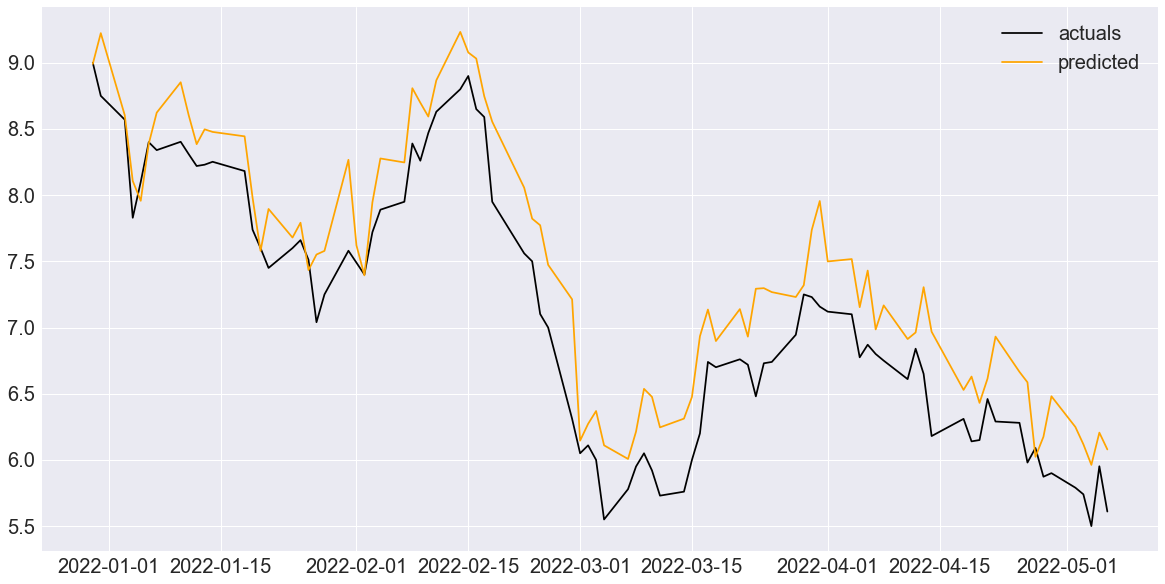

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['curlf_next_close'], color='black')
ax.plot(y_test5['curlf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CURLF target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   
2018-11-01     11    1  2018        4  37.230000  38.278000  35.849998   
2018-11-02     11    2  2018        4  37.430000  38.174999  35.869999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   
2018-11-01  37.029999     8829000       36.889999       37.139999  0.140000   
2018-11-02  37.139999     6357400       37.029999       40.090000  0.110000   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   
2018-11-01     0.003795              35.932          -0.488000   
2018-11-02     0.002971              35.620          -0.312000   
...                 ...                 ...                ...   
2022-05-03     0.001653               5.700           0.152000   
2022-05-04     0.100660               5.988           0.288000   
2022-05-05    -0.089955               6.112           0.124000   
2022-05-06    -0.016474               6.164           0.052000   
2022-05-09    -0.070352               6.064          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382        0.00       0.000   
2018-10-30            41.202999              -1.904        0.00       0.000   
2018-10-31            39.822999              -1.380        0.00       0.000   
2018-11-01            38.634999              -1.188        0.00       0.000   
2018-11-02            37.663999              -0.971        0.00       0.000   
...                         ...                 ...         ...         ...   
2022-05-03             5.642000               0.013        4.50       4.750   
2022-05-04             5.736000               0.094        4.22       4.414   
2022-05-05             5.768000               0.032        4.20       4.250   
2022-05-06             5.808000               0.040        3.92       4.340   
2022-05-09             5.806000              -0.002        4.30       4.300   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

798

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

798
89


In [202]:
X_train6 = train6.drop('curlf_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-10-29     10   29  2018        4  39.310001  39.700001  32.310001   
2018-10-30     10   30  2018        4  32.009998  34.919998  31.820000   
2018-10-31     10   31  2018        4  35.320000  37.369999  34.619999   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-10-29  33.070000    16708800       38.700001       33.970001 -5.630001   
2018-10-30  33.970001    12123200       33.070000       36.889999  0.900001   
2018-10-31  36.889999    11769900       33.970001       37.029999  2.919998   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-10-29    -0.145478              38.002          -1.706000   
2018-10-30     0.027215              36.594          -1.407999   
2018-10-31     0.085958              36.420          -0.174000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-10-29            43.106999              -2.382         0.0         0.0   
2018-10-30            41.202999              -1.904         0.0         0.0   
2018-10-31            39.822999              -1.380         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-10-29        0.0          0.0           0.0               0.0   
2018-10-30        0.0          0.0           0.0               0.0   
2018-10-31        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-10-29               0.0         0.0            0.0                   0.0   
2018-10-30               0.0         0.0            0.0                   0.0   
2018-10-31               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-10-29                  0.0                    0.0                   0.0   
2018-10-30                  0.0                    0.0                   0.0   
2018-10-31                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-10-29       7.94      8.040       6.6        6.80   11982700.0   
2018-10-30       6.50      7.263       6.5        7.05    7104600.0   
2018-10-31       7.28      7.629       7.1        7.42    8298700.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-10-29             7.78             7.05      -0.98     -0.125964   
2018-10-30             6.80             7.42       0.25      0.036765   
2018-10-31             7.05             7.70       0.37      0.052482   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-10-29                7.732              -0.344                 8.978   
2018-10-30                7.474              -0.258                 8.531   
2018-10-31                7.432              -0.042                 8.208   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-10-29               -0.494       7.946        8.50      5.824   
2018-10-30               -0.447       5.65

In [203]:
X_train6.shape

(798, 419)

In [204]:
y_train6 = train6['curlf_next_close']
y_train6.head(3)

Date
2018-10-29    6.560
2018-10-30    7.210
2018-10-31    8.409
Name: curlf_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2021-12-27    8.500
2021-12-28    8.210
2021-12-29    8.673
Name: curlf_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('curlf_next_close', axis=1)
y_test6 = test6['curlf_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-12-30     12   30  2021        4      8.76     9.295    8.705       8.94   
2021-12-31     12   31  2021        4      8.91     9.190    8.720       8.73   
2022-01-03      1    3  2022        1      8.86     9.640    8.800       9.30   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-12-30     7548700            8.76            8.73      0.18     0.020548   
2021-12-31     6512800            8.94            9.30     -0.21    -0.023490   
2022-01-03     7155500            8.73            8.97      0.57     0.065292   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-12-30               9.158             -0.086                9.230   
2021-12-31               8.980             -0.178                9.189   
2022-01-03               8.950             -0.030                9.160   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-12-30              -0.033        6.65       6.788       6.30   
2021-12-31              -0.041        6.52       6.790       6.52   
2022-01-03              -0.029        6.67       7.270       6.67   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-12-30         6.66     1081900.0              6.61              6.67   
2021-12-31         6.67      769000.0              6.66              6.75   
2022-01-03         6.75      617200.0              6.67              6.55   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-12-30        0.05       0.007564                 6.658   
2021-12-31        0.01       0.001502                 6.664   
2022-01-03        0.08       0.011994                 6.638   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-12-30                0.052                 6.5669                -0.034   
2021-12-31                0.006                 6.5469                -0.020   
2022-01-03               -0.026                 6.5559                 0.009   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-12-30      3.795       4.18     3.792        4.01    4337300.0   
2021-12-31      3.970       4.13     3.910        3.92    3271300.0   
2022-01-03      3.990       4.29     3.940        4.20    2695300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-12-30             3.85             3.92       0.16      0.041558   
2021-12-31             4.01             4.20      -0.09     -0.022444   
2022-01-03             3.92             4.11       0.28      0.071429   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-12-30                4.052              -0.042                 4.115   
2021-12-31                3.984              -0.068                 4.108   
2022-01-03                3.988               0.004                 4.097   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-12-30               -0.010        8.00       8.750      8.000   
2021-12-31               -0.007        8.52       9.036      8

In [208]:
X_test6.shape

(89, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-04    5.500
2022-05-05    5.952
2022-05-06    5.610
Name: curlf_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([8.9618149 , 9.15822801, 8.53805245, 8.11180816, 7.90280977])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.34886315013222824


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.2929444383250186


In [214]:
hyper_table.append(dict(version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

In [215]:
y_train6 = pd.DataFrame(y_train6, columns=['curlf_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['curlf_next_close'])

In [216]:
y_test6['curlf_pred_next_close'] = y_pred6

In [217]:
y_test6.tail()

curlf_next_close  curlf_pred_next_close
Date                                               
2022-05-02             5.790               6.173864
2022-05-03             5.740               6.053305
2022-05-04             5.500               5.901736
2022-05-05             5.952               6.057704
2022-05-06             5.610               5.963670

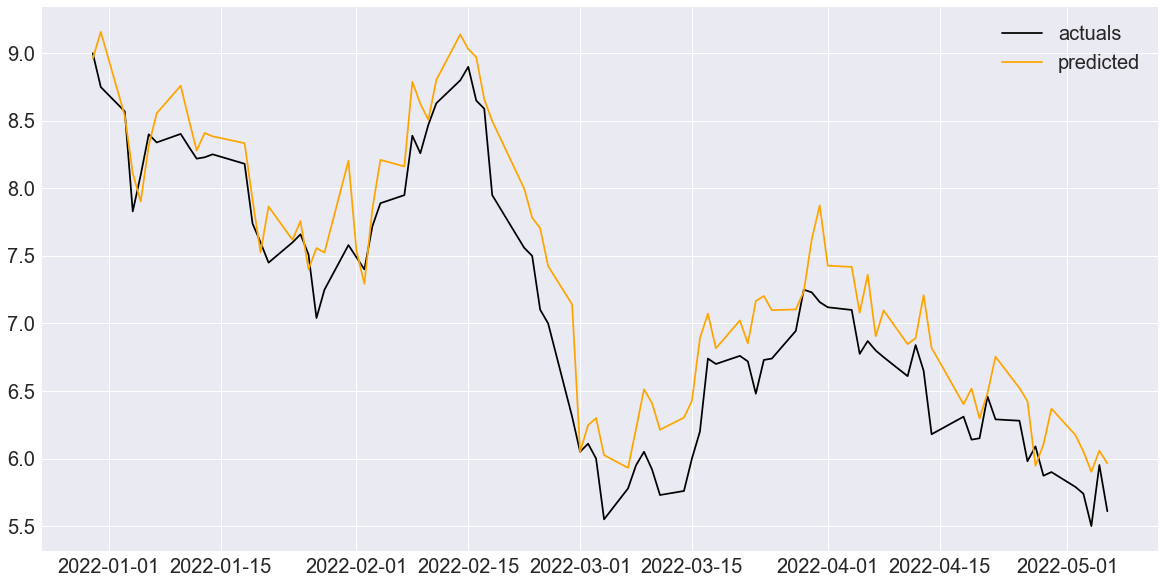

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['curlf_next_close'], color='black')
ax.plot(y_test6['curlf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

version               model      rmse       mae  rows  train_rows  \
1        1+ETFs  LinearRegression()  0.183065  0.142135   887         798   
2    1+ETFs+Dow  LinearRegression()  0.195558  0.146562   887         798   
3    All stocks  LinearRegression()  0.228642  0.176847   887         798   
4       All+Dow  LinearRegression()  0.249122  0.194959   887         798   
0         1+Dow  LinearRegression()  0.260913  0.195779   887         798   
6  All+ETFs+Dow  LinearRegression()  0.348863  0.292944   887         798   
5      All+ETFs  LinearRegression()  0.413693  0.359631   887         798   

   test_rows  columns  
1         89      160  
2         89      186  
3         89      264  
4         89      290  
0         89       56  
6         89      420  
5         89      394

In [220]:
# hyper_table.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table.csv', index=False)